In [1]:
from EdgeFinderV3 import BoundaryDetector as BD
from EdgeFinderV2 import EdgeFinder as ef
from PIL import Image
from ImageFrame import Frame
import numpy as np
import timeit

In [2]:
#creating frame and importing image
frame1 = Frame(1280,720,10)
img = Image.open("TestingImage/Image"+str(1)+".jpg")
#applying the masks to the image
data = frame1.get_data(img,0)
#kernal
kernal = np.array([-1,-1,0,1,1])

load CVS file successfully


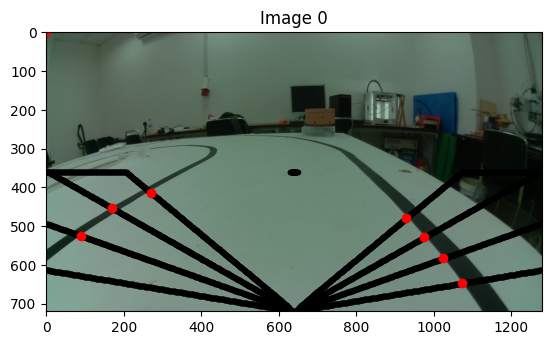

In [3]:
#Using EdgeDetection
BP = BD(data,kernal,frame1,0,25)
BP.ploting_onImage(img)

In [4]:
P = BP.boundary

In [5]:
count =0
for n in range(0,P.shape[0],2):
    A = P[n,:]
    B = P[n+1,:]
    C = A*B
    if np.nonzero(C) : count += 1
    print(C)
print(count)

[0. 0.]
[ 91136. 306075.]
[164606. 239637.]
[249901. 197827.]
4


In [6]:
print(np.where(P[:,0]==0))

(array([1], dtype=int64),)


In [7]:
ex = np.array([[1,1],[0,0],[0,0],[1,1],[1,1],[1,1],[1,1],[1,1]])
zero_Element = np.where(ex[:,0]==0)[0]
if len(zero_Element)-len(ex)<=4:
    print(zero_Element)
    print(f'There is a pair we can use {(len(ex)-len(zero_Element))/2} pairs')

[1 2]
There is a pair we can use 3.0 pairs


In [11]:
import math

def m_point_calculator(data,width):
    data_size = int(len(data))
    result_angles1 = np.empty((0,1),float)
    result_angles2 = np.empty((0,1),float)
    mids = np.empty((0,2),float)
    for i in range (0, data_size,2):
        mid = (data[i] + data[i+1])/2
        tan = (mid[0]-(width/2.))/(mid[1])
        angle_radiant = math.atan(tan)
        angle_degree = math.degrees(angle_radiant)
        mids = np.append(mids,[mid],axis= 0)
        result_angles1 = np.append(result_angles1,[[angle_degree]],axis=0)
    for i in range(1,len(mids)):
        angle_degree = math.degrees(math.atan((mids[i,0]-(mids[0,0]))/(mids[i,1]-mids[0,1])))
        result_angles2 = np.append(result_angles2,[[angle_degree]],axis=0)
    return [result_angles1,result_angles2],mids

def evaluating_side(boundary,pairs_needed,frame):
    pairs = np.empty([0,2])
    for n in range(0,len(boundary),2):
        if boundary[n].any() and boundary[n+1].any():
            pairs = np.append(pairs,[boundary[n],boundary[n+1]],axis=0)
        if len(pairs) >= pairs_needed*2:
            return m_point_calculator(pairs,frame.width)
    case_2(boundary)
def case_2(boundary):
    non_zero =  np.nonzero(boundary[:,0])[0]
    if len(non_zero)>=4: 
        boundary[non_zero[1]]-boundary[non_zero[0]]


In [12]:
evaluating_side(P,3,frame1)

In [10]:
ex = np.array([[1,1],[0,0],[1,1],[0,0],[1,1],[0,0],[1,1],[1,1]])
points = np.empty([0,2])
for n in range(0,len(ex),2):
    if ex[n].any() and ex[n+1].any():
        points = np.append(points,[ex[n],ex[n+1]],axis=0)
        print(f"{n} and {n+1}  ispairs")
    if len(points) >= 3*2: 
        break 

print(points.T.shape)
    

6 and 7  ispairs
(2, 2)
